# Linear Regression

Fitting a straight line to our dataset for predicting outputs

y = mx + c
 is the equation of a straight line

 Here y is the output variable, x is the feature/input

 and we estimate the values of m and c such that this line best fits our dataset


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.datasets
from sklearn.model_selection import train_test_split

## Least squares

This method minimizes the mean squared error of the model: sum of the squared differences between predicted and actual values.

### Dataset

We create a sample dataset for our regression task using the make_regression from sklearn

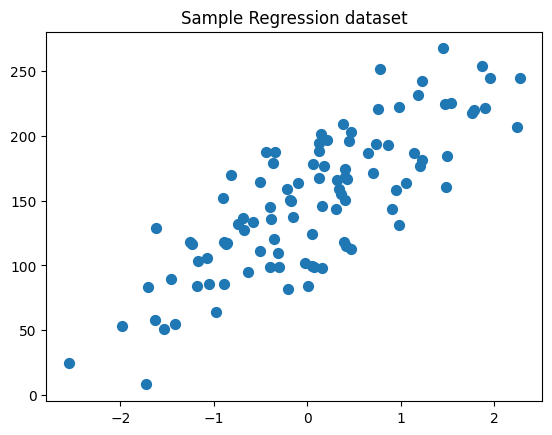

In [7]:
from sklearn.datasets import make_regression
X ,y =make_regression(n_samples = 100, n_features= 1, n_informative= 1, bias= 150, noise= 30, random_state= 0)
plt.scatter(X,y,marker='o',s=50)
plt.title('Sample Regression dataset');

### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

X_train ,X_test ,y_train,y_test = train_test_split(X,y,random_state=0)

linreg = LinearRegression()
linreg.fit(X_train,y_train)

print('Linear model coeff(m): {}' .format(linreg.coef_))
print('Linear model intercept(b): {:.3f}' .format(linreg.intercept_))
print('R_squared training score: {:.3f}' .format(linreg.score(X_train,y_train)))
print('R_squared test score: {:.3f}' .format(linreg.score(X_test,y_test)))

Linear model coeff(m): [45.70870465]
Linear model intercept(b): 148.446
R_squared training score: 0.679
R_squared test score: 0.492


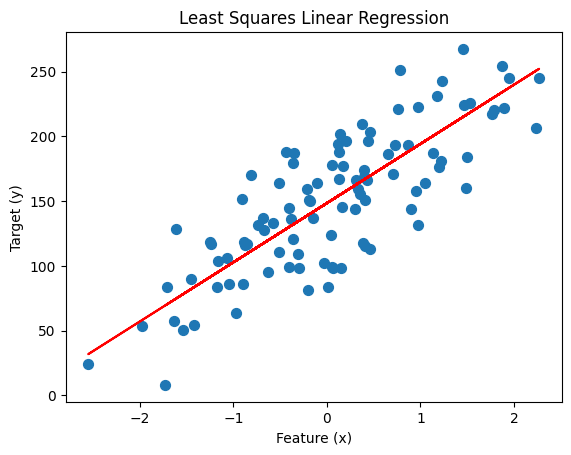

In [19]:
plt.figure()
plt.scatter(X,y,marker='o',s=50)
plt.plot(X,linreg.coef_*X+linreg.intercept_,c='r')
plt.title('Least Squares Linear Regression')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)');

### Applying Linear Regression on the California Housing Dataset

In [21]:
dir(sklearn.datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

In [36]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [38]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
housing

In [162]:
df=pd.DataFrame(housing.data,columns=housing.feature_names)
df['target']=housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [46]:
df.shape

(20640, 9)

In [52]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [163]:
X=df.drop('target',axis=1)
y=df['target']
len(X)

20640

In [164]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0)

In [165]:
linreg.fit(X_train,y_train)

LinearRegression()

In [166]:
print('California Housing dataset')
print('linear model intercept: {:.3f}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

California Housing dataset
linear model intercept: -36.610
linear model coeff:
[ 4.39091042e-01  9.59864665e-03 -1.03311173e-01  6.16730152e-01
 -7.63275197e-06 -4.48838256e-03 -4.17353284e-01 -4.30614462e-01]
R-squared score (training): 0.611
R-squared score (test): 0.591


## Ridge Regression

Uses the same least squares method but also adds a penalty for large variations in feature values. This is called regularization, and is used to prevent overfitting and make the model simpler. Ridge uses L2 regularization : minimize sum of squares of features. the regularization is controlled using a parameter α 'alpha'.

In [85]:
from sklearn.linear_model import Ridge

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
linridge = Ridge(alpha=20.0)
linridge.fit(X_train,y_train)

print('California Housing Dataset')
print('Ridge model intercept: {:.3f}' .format(linridge.intercept_))
print('Ridge model Coeff: {}' .format(linridge.coef_))
print('R-squared score (training): {:.3f}' .format(linridge.score(X_train,y_train)))
print('R-squared score (test): {:.3f}' .format(linridge.score(X_test,y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

California Housing Dataset
Ridge model intercept: -36.521
Ridge model Coeff: [ 4.36683135e-01  9.64255143e-03 -9.87088956e-02  5.92713891e-01
 -7.43896909e-06 -4.50522576e-03 -4.16881608e-01 -4.29808099e-01]
R-squared score (training): 0.611
R-squared score (test): 0.591
Number of non-zero features: 8


### Ridge regression with feature normalization

Normalization of features means geeting all the features in the same scale.

Here we use MinMax scaling for the features to get all of them in the 0 and 1 range

x' = [x-x(min)]/[x(max)-x(min)]

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=5.0)
linridge.fit(X_train_scaled,y_train)

Ridge(alpha=5.0)

In [108]:
print('California Housing Dataset')
print('Ridge model intercept: {:.3f}' .format(linridge.intercept_))
print('Ridge model Coeff: {}' .format(linridge.coef_))
print('R-squared score (training): {:.3f}' .format(linridge.score(X_train_scaled,y_train)))
print('R-squared score (test): {:.3f}' .format(linridge.score(X_test_scaled,y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

California Housing Dataset
Ridge model intercept: 3.712
Ridge model Coeff: [ 5.5040445   0.52770957  0.32332782  1.84444532 -0.15891883 -0.80211958
 -3.84999558 -4.16419745]
R-squared score (training): 0.602
R-squared score (test): 0.580
Number of non-zero features: 8


In [109]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 6, r-squared training: 0.61, r-squared test: 0.59

Alpha = 1.00
num abs(coeff) > 1.0: 6, r-squared training: 0.61, r-squared test: 0.58

Alpha = 10.00
num abs(coeff) > 1.0: 4, r-squared training: 0.60, r-squared test: 0.58

Alpha = 20.00
num abs(coeff) > 1.0: 3, r-squared training: 0.59, r-squared test: 0.57

Alpha = 50.00
num abs(coeff) > 1.0: 3, r-squared training: 0.57, r-squared test: 0.55

Alpha = 100.00
num abs(coeff) > 1.0: 3, r-squared training: 0.53, r-squared test: 0.52

Alpha = 1000.00
num abs(coeff) > 1.0: 1, r-squared training: 0.21, r-squared test: 0.21



## Lasso Regression

It uses L1 regularization. It minimizes the sum of absolute values of the coefficients.

In [137]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=0.001, max_iter = 10000)
linlasso.fit(X_train_scaled,y_train)

print('California Housing Dataset')
print('Lasso regression model intercept: {:.3f}' .format(linlasso.intercept_))
print('Lasso regression model coeff: {}' .format(linlasso.coef_))
print('Lasso regression score (training): {:.3f}' .format(linlasso.score(X_train_scaled,y_train)))
print('Lasso regression score (test): {:.3f}' .format(linlasso.score(X_test_scaled,y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))

California Housing Dataset
Lasso regression model intercept: 3.758
Lasso regression model coeff: [ 5.54793825  0.51127131  0.          0.32993684 -0.         -0.
 -3.85697759 -4.18462397]
Lasso regression score (training): 0.600
Lasso regression score (test): 0.577
Number of non-zero features: 5


In [141]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.0001,0.001,0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)

    print('Alpha = {:.3f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.000
Features kept: 8, r-squared training: 0.61, r-squared test: 0.59

Alpha = 0.001
Features kept: 5, r-squared training: 0.60, r-squared test: 0.58

Alpha = 0.500
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 1.000
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 2.000
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 3.000
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 5.000
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 10.000
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 20.000
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 50.000
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00



Lasso Regression should only be used when there are a very large number of features in our dataset and we know that only a small amount of features contribute largely to the final output(This model makes the unused features 0).

## Polynomial Regression

Transforming our problem into a higher dimension regression space

This is done by adding new features made by combinations of already existing features

And the method of least squares is applied using all the features old and new

This method of polynomial regression has more potential of overfitting and hence is usually done with a regularized method like ridge regression

In [167]:
from sklearn.preprocessing import PolynomialFeatures

print('Linear Regression')
print('Linear Regression intercept: {}' .format(linreg.intercept_))
print('Linear Regression coeff: {}' .format(linreg.coef_))
print('Linear Regression score (training): {:.3f}' .format(linreg.score(X_train,y_train)))
print('Linear Regression score (test): {:.3f}' .format(linreg.score(X_test,y_test)))

poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)

X_train,X_test,y_train,y_test= train_test_split(X_poly,y,random_state=0)

linreg.fit(X_train,y_train)
print('\n (poly deg 2) Linear Regression')
print('Linear Regression intercept: {}' .format(linreg.intercept_))
print('Linear Regression coeff: {}' .format(linreg.coef_))
print('Linear Regression R-squared score (training): {:.3f}' .format(linreg.score(X_train,y_train)))
print('Linear Regression R-squared score (test): {:.3f}' .format(linreg.score(X_test,y_test)))

linridge.fit(X_train,y_train)
print('\n (poly deg 2) Linear Ridge Regression')
print('Linear Ridge Regression intercept: {}' .format(linridge.intercept_))
print('Linear Ridge Regression coeff: {}' .format(linridge.coef_))
print('Linear Ridge Regression R-squared score (training): {:.3f}' .format(linridge.score(X_train,y_train)))
print('Linear Ridge Regression R-squared score (test): {:.3f}' .format(linridge.score(X_test,y_test)))

Linear Regression
Linear Regression intercept: -36.609593778714334
Linear Regression coeff: [ 4.39091042e-01  9.59864665e-03 -1.03311173e-01  6.16730152e-01
 -7.63275197e-06 -4.48838256e-03 -4.17353284e-01 -4.30614462e-01]
Linear Regression score (training): 0.611
Linear Regression score (test): 0.591

 (poly deg 2) Linear Regression
Linear Regression intercept: 246.40431428975828
Linear Regression coeff: [-2.14227651e-07 -1.10273759e+01 -8.22128941e-01  6.21383479e+00
 -3.30268499e+01 -3.56127884e-04  2.75874863e+00  9.49911713e+00
  6.83271700e+00 -3.04995181e-02  2.45578552e-03  4.32816185e-02
 -1.77943374e-01  5.47862740e-05 -5.72692626e-03 -1.51426157e-01
 -1.41939856e-01  2.31114887e-04 -2.11396929e-03  1.63579790e-02
  2.28510813e-06 -1.50973134e-04 -9.52114297e-03 -9.53803674e-03
  1.24110652e-03 -1.07007192e-02 -6.75272545e-05  4.60498260e-02
  9.02858425e-02  8.14074626e-02  2.46370020e-02  5.17402830e-04
 -2.80744921e-01 -4.73200702e-01 -4.29628881e-01  2.34552466e-09
  1.95